<img src = "https://universidadean.edu.co/sites/default/files/noticias/galeria/Logo-Universidad-Ean-fondo-negro-Galeria_1.jpg" alt = "Universidad EAN" width = "50%"  height="160
0">  </img>

En esta guía de trabajo usted deberá poner en práctica los conceptos fundamentales y las herramientas para realizar **análisis de correlación** y **análisis de regresión** con *Python*.  

Para iniciar, se requiere cargar las librarías necesarias, en caso de necesitar otras puede agregarlas a la celda.

In [2]:
# Cargar librerías
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# librerías relacionadas con modelos de regresión
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# **⚛️ Análisis de correlación y modelos de regresión**  
---  

La actividad a desarrollar estará centrada en explorar de manera práctica dos conceptos importantes:

**Análisis de correlación**: Se puede definir como un proceso estadístico en el que se busca identificar asociaciones (relaciones o dependencias) entre dos variables. Estas relaciones se pueden medir a partir de un coeficiente de correlación.

**Análisis de regresión** es el proceso estadístico en el que se busca modelar o definir relaciones y asociaciones específicas entre variables.




## **⚛️ Datos**
---

La base de datos a utilizar se denimona **`Framingham`**. Este conjunto de datos está disponible públicamente en el sitio web de [Kaggle](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression), y es de un estudio de riesgo cardiovascular sobre los residentes de la ciudad de Framingham, Massachusetts en Estados Unidos. El objetivo de la clasificación es predecir si el paciente tiene un riesgo de 10 años de padecer una futura enfermedad coronaria (CHD). El conjunto de datos proporciona la información de los pacientes con más de 3.000 registros y 15 atributos. Se incluyen diferentes variables con factores de riesgo potenciales a nivel demográficos, comportamentales y médicos.

**Demográficos:**
* **`male`**: Masculino o femenino (Nominal).
* **`age`**: Edad del paciente (las edades registradas han sido truncadas a números enteros, sin embargo, recordar que la edad en una variable numérica continua).

**Comportamiento:**
* **`currentSmoker`**: Si el paciente es o no fumador actualmente.
* **`cigsPerDay`**: El número de cigarrillos que la persona fuma en promedio en un día (puede considerarse continuo, ya que se puede tener cualquier número de cigarrillos, incluso medio cigarrillo).

**Historia médica:**
* **`BPMeds`**: Si el paciente estaba o no tomando medicamentos para la presión sanguínea (nominal).
* **`prevalentStroke`**: Si el paciente ha tenido previamente una apoplejía o no (nominal).
* **`prevalentHyp`**: Si el paciente era o no hipertenso (nominal).
* **`diabetes`**: Si el paciente tenía o no diabetes (nominal).
* **`totChol`**: Nivel de colesterol total (continuo).
* **`sysBP`**: Presión sanguínea sistólica (continua).
* **`diaBP`**: Presión arterial diastólica (continua).
* **`BMI`**: Índice de Masa Corporal - IMC (continuo).
* **`heartRate`**: Ritmo cardíaco (continuo).
* **`glucose`**: Nivel de glucosa (continuo).

**Variable objetivo deseada:**
* **`TenYearCHD`**: Riesgo de enfermedad coronaria CHD a 10 años (binario: "1", significa "Sí", "0" significa "No").

In [3]:
url = "https://docs.google.com/uc?export=download&id=1z2k_-8DtwRGFZhRlSmJBwLn6d0JdLt_k"
df = pd.read_csv(url)

**Nombres de los integrantes del grupo**

*   Jiliar Antonio Silgado Cardona

## **✅ Exploración de los datos**

### **⭕️ Introducción a la Fase de Exploración de Datos**

En esta fase inicial del análisis de datos, se realiza una exploración preliminar del conjunto de datos para comprender su estructura y características básicas. Esta etapa es crucial para identificar los aspectos fundamentales del dataset y preparar el terreno para un análisis más profundo.

Durante la exploración, se utilizan diversas instrucciones para obtener una visión general del conjunto de datos:

- **`df.info()`**: Proporciona un resumen conciso de la información del DataFrame, incluyendo el número de entradas no nulas y los tipos de datos de cada columna.
- **`print(df.shape)`**: Muestra las dimensiones del DataFrame, es decir, el número de filas y columnas.
- **`print(df.head())`**: Muestra las primeras filas del DataFrame, facilitando una vista rápida de los datos.
- **`print(df.tail())`**: Muestra las últimas filas del DataFrame, útil para verificar el final del dataset.
- **`print(total_size)`**: Indica el tamaño total del DataFrame en términos de número de filas.
- **`print(df.shape)`**: Indica la dimensión del Dataframe (filas, columnas).
- **`print(df.memory_usage(deep=True))`**: Proporciona el uso de memoria por columna, permitiendo identificar el consumo de recursos.
- **`print(df.columns)`**: Lista los nombres de todas las columnas en el DataFrame.

Estas instrucciones ofrecen una visión general del conjunto de datos, ayudando a detectar posibles problemas como datos faltantes, tipos de datos incorrectos o inconsistencias. Esta exploración es un primer paso esencial para un análisis de datos eficaz.

In [4]:
# Información de Dataframe
print("Información general del DataFrame:\n")
df.info()

Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)


### **⭕️ Diccionario de datos**

Este diccionario de datos proporciona una descripción detallada de las columnas contenidas en el archivo `Framingham.csv`, que contiene información demográfica, de comportamiento y de historial médico relacionada con la salud cardiovascular de los pacientes. Cada columna está detallada con su tipo de dato (`Dtype`), una breve descripción del tipo de dato (`Descripción Dtype`), el tamaño en bytes ocupado por el tipo de dato (`Tamaño en Bytes`), y una descripción de los datos representados en esa columna.

El propósito de este diccionario es facilitar la comprensión de la estructura del conjunto de datos y ayudar en el análisis y la manipulación de la información.

**Descripción de las Columnas en** `Framingham.csv`

| Column           | Dtype    | Descripción Dtype                      | Tamaño en Bytes | Descripción                                                                                                                |
|------------------|----------|----------------------------------------|-----------------|----------------------------------------------------------------------------------------------------------------------------|
| `male`           | int64    | Entero de 64 bits                      | 8 bytes         | Indica el sexo del paciente: 1 para masculino y 0 para femenino.                                                           |
| `age`            | int64    | Entero de 64 bits                      | 8 bytes         | Edad del paciente en años.                                                                                                 |
| `currentSmoker`  | int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente es fumador actualmente: 1 para sí, 0 para no.                                                        |
| `cigsPerDay`     | float64  | Flotante de 64 bits                    | 8 bytes         | Número promedio de cigarrillos fumados por día.                                                                            |
| `BPMeds`         | int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente toma medicamentos para la presión arterial: 1 para sí, 0 para no.                                    |
| `prevalentStroke`| int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente ha sufrido un derrame cerebral previamente: 1 para sí, 0 para no.                                    |
| `prevalentHyp`   | int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente ha sido diagnosticado con hipertensión: 1 para sí, 0 para no.                                        |
| `diabetes`       | int64    | Entero de 64 bits                      | 8 bytes         | Indica si el paciente tiene diabetes: 1 para sí, 0 para no.                                                                |
| `totChol`        | float64  | Flotante de 64 bits                    | 8 bytes         | Nivel de colesterol total en la sangre (mg/dL).                                                                            |
| `sysBP`          | float64  | Flotante de 64 bits                    | 8 bytes         | Presión arterial sistólica en mmHg.                                                                                        |
| `diaBP`          | float64  | Flotante de 64 bits                    | 8 bytes         | Presión arterial diastólica en mmHg.                                                                                       |
| `BMI`            | float64  | Flotante de 64 bits                    | 8 bytes         | Índice de Masa Corporal - IMC del paciente.                                                                                |
| `heartRate`      | float64  | Flotante de 64 bits                    | 8 bytes         | Ritmo cardíaco del paciente (latidos por minuto).                                                                          |
| `glucose`        | float64  | Flotante de 64 bits                    | 8 bytes         | Nivel de glucosa en sangre (mg/dL).                                                                                        |
| `TenYearCHD`     | int64    | Entero de 64 bits                      | 8 bytes         | Indica el riesgo de enfermedad coronaria en 10 años: 1 para riesgo presente, 0 para sin riesgo.                            |

Este diccionario de datos facilita la interpretación de las características del dataset y proporciona una visión clara de la naturaleza de los datos que se deben considerar en el análisis del riesgo de enfermedad coronaria.


#### **⭕️ Primeras filas del DataFrame**

In [5]:
# Primeros registros
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

#### **⭕️ Últimas filas del DataFrame**

In [6]:
# ultimos registros
print(df.tail())

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0  

#### **⭕️ Tamaño total del DataFrame en términos de número de filas**

In [7]:
# total de registros
total_size = len(df)
print(f'Tamaño (Número de Filas): {total_size}')

Tamaño (Número de Filas): 4238


#### **⭕️ Dimensión del Dataframe (Filas x Columnas)**

In [8]:
# dimensión del conjunto de datos (filas, columnas)
print("\nDimensión del conjunto de datos (filas, columnas):")
print(df.shape)


Dimensión del conjunto de datos (filas, columnas):
(4238, 16)


#### **⭕️ Uso de memoria por columna**

In [9]:
# mostrar el tamaño de la memoria utilizada por el DataFrame
print("Memoria utilizada por el DataFrame (bytes):\n")
print(df.memory_usage(deep=True))

Memoria utilizada por el DataFrame (bytes):

Index                132
male               33904
age                33904
education          33904
currentSmoker      33904
cigsPerDay         33904
BPMeds             33904
prevalentStroke    33904
prevalentHyp       33904
diabetes           33904
totChol            33904
sysBP              33904
diaBP              33904
BMI                33904
heartRate          33904
glucose            33904
TenYearCHD         33904
dtype: int64


#### **⭕️ Columnas (Variables) en Dataframe**

In [10]:
# nombres de las columnas
print("\nNombres de las columnas:")
print(df.columns)


Nombres de las columnas:
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


#### **⭕️ Número Total de Variables**

In [11]:
# Número total de variables que contiene la base de datos.
num_columnas = df.shape[1]
print(f'Número de variables (columnas): {num_columnas}')

Número de variables (columnas): 16


#### **⭕️ Variables con datos faltantes, Porcentaje total de valores faltantes en la base de datos.**

In [12]:
import json

# Escribir las variables que tienen datos faltantes, además, proporcionar el porcentaje total de valores faltantes en la base de datos.
# Paso 1: Encontrar columnas con valores faltantes
faltantes_por_columna = df.isnull().sum()

# Paso 2: Filtrar columnas que tienen valores faltantes
data1 = faltantes_por_columna[faltantes_por_columna > 0]
variables_con_faltantes = data1.to_dict()

print('\nCant. valores faltantes por columna:',
      json.dumps(variables_con_faltantes, indent=4),
      sep="\n")

# Paso 3: Calcular el porcentaje de valores faltantes por columna
data = (data1 / len(df)) * 100
data = data.to_dict()
porcentaje_faltantes_por_columna = {key: f'{value:.2f}%' for key, value in data.items()}

# Paso 4: Calcular el porcentaje total de valores faltantes en el DataFrame
porcentaje_total_faltantes = (df.isnull().sum().sum() / df.size) * 100
porcentaje_total_no_faltantes = (df.notnull().sum().sum() / df.size) * 100

# Resultados
print('\n% valores faltantes por columna:', f'{json.dumps(porcentaje_faltantes_por_columna, indent=4)}', sep="\n")

print(f"\nPorcentaje total de valores faltantes en la base de datos: {porcentaje_total_faltantes:.2f}%")
print(f"Porcentaje total de valores en la base de datos: {porcentaje_total_no_faltantes:.2f}%")


Cant. valores faltantes por columna:
{
    "education": 105,
    "cigsPerDay": 29,
    "BPMeds": 53,
    "totChol": 50,
    "BMI": 19,
    "heartRate": 1,
    "glucose": 388
}

% valores faltantes por columna:
{
    "education": "2.48%",
    "cigsPerDay": "0.68%",
    "BPMeds": "1.25%",
    "totChol": "1.18%",
    "BMI": "0.45%",
    "heartRate": "0.02%",
    "glucose": "9.16%"
}

Porcentaje total de valores faltantes en la base de datos: 0.95%
Porcentaje total de valores en la base de datos: 99.05%


#### **⭕️ Limpieza de datos**

In [13]:
df.dropna(axis=0, inplace=True) # Se eliminan registros con valores faltantes
# Nueva dimensión del conjunto de datos (filas, columnas)
print("\nNueva Dimensión del conjunto de datos (filas, columnas):")
print(df.shape)


Nueva Dimensión del conjunto de datos (filas, columnas):
(3656, 16)


##**⚛️ 1.0 Exploración de la correlación**  
---
Suponga que usted quiere modelar la relación existente entre la presión sistólica de los pacientes y su edad.

La primera tarea a relizar consiste en explorar la relación entre las variables de forma gráfica. Construya una gráfica de dispersión donde se pueda revisar la asociación entre las variables, recuerde realizar un análisis de la informacón que muestra la gráfica.

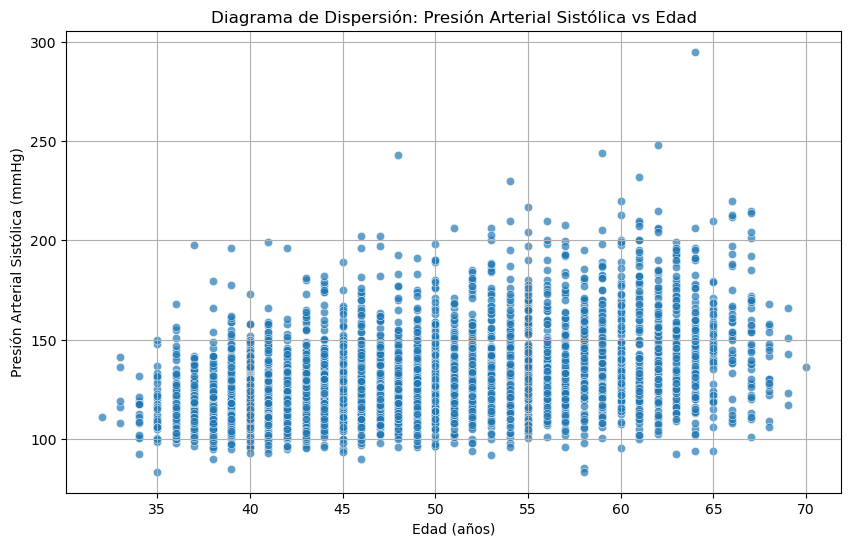

In [14]:
# Escriba aquí el código correspondiente
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='sysBP', alpha=0.7)
plt.title('Diagrama de Dispersión: Presión Arterial Sistólica vs Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Presión Arterial Sistólica (mmHg)')
plt.grid(True)
plt.show()

## ⭕️ **Analisis del Grafico**

*   **Distribución de los puntos:** Se logra apreciar que los puntos se concentran mayormente entre las edades 32 a 70 años, pero especificamente aumenta su concentración a medida que pasan los años.
*   **Tendencia:** Los puntos parecen seguir una tendencia ascendente, lo que indica que a medida que los pacientes envejecen, su presión arterial sistólica tiende a ser más alta.
*   **Dispersión:** los puntos se encuentran muy conentrados pero hay uno que otro punto con comportamiento atipico, puesto que estan dispersos de la concentración de puntos, esto puede que resulte ser producto de alguna enfermedad en ciertas personas.

## ⭕️ **Conclusión**

En conclusión, el análisis de la relación entre la edad y la presión arterial sistólica revela una clara tendencia ascendente en los datos, donde los puntos se concentran principalmente entre las edades de 32 a 70 años, aumentando su densidad con el paso del tiempo. Esta tendencia indica que a medida que los pacientes envejecen, su presión arterial sistólica tiende a ser más alta. Sin embargo, aunque la mayoría de los puntos están bien concentrados, se observan algunos valores atípicos que podrían ser indicativos de condiciones médicas específicas en ciertos individuos.


## **⚛️ 2.0 Exploración de la correlación**  
---
Para revisar la asociación lineal entre las variables presión sistólica de los pacientes y edad, se requiere calcular el coeficente de correlación lineal de Pearson.  
Hallar el coeficiente de correlación para estas dos variables y analizar el resultado.

In [16]:
# Análisis descriptivo de la relación
age = df['age']
sysBP = df['sysBP']

# Calcular el coeficiente de correlación de Pearson
correlation_coefficient, p_value = stats.pearsonr(age, sysBP)

# Mostrar el coeficiente de correlación y el valor p
print(f'Coeficiente de correlación de Pearson: {correlation_coefficient:.2f}')
print(f'Valor p: {p_value:.4f}')

Coeficiente de correlación de Pearson: 0.39
Valor p: 0.0000


## ⭕️ **Correlación:**

Un coeficiente de 0.39 indica una correlación positiva moderada entre las dos variables. Esto sugiere que, en general, a medida que la edad de los pacientes aumenta, también tiende a aumentar la presión arterial sistólica, aunque la relación no es muy fuerte. Esto podría implicar que, aunque la edad es un factor asociado con la presión arterial sistólica, no es el único determinante. Otros factores, como el estilo de vida, la genética y las condiciones de salud subyacentes, también pueden influir en la presión arterial.

##**⚛️ 3.0 Estimar los parámetros del modelo**  
---
Se requiere estimar la **pendiente ($β$)** y el **intercepto (α)** de la regresión para poder construir la ecuación general de la recta que mejor describe la relación entre las dos variables:
Para este caso el modelo tendrá la forma:

$$sysBP = β * age + α$$
Realice la estimación de los parámetros del modelo de regresión lineal simple y relice un análisis de cada parámetro estimado.


## ⭕️ **Solución:**

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     649.7
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          4.69e-132
Time:                        11:20:35   Log-Likelihood:                -16204.
No. Observations:                3656   AIC:                         3.241e+04
Df Residuals:                    3654   BIC:                         3.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.6780      1.978     41.793      0.0

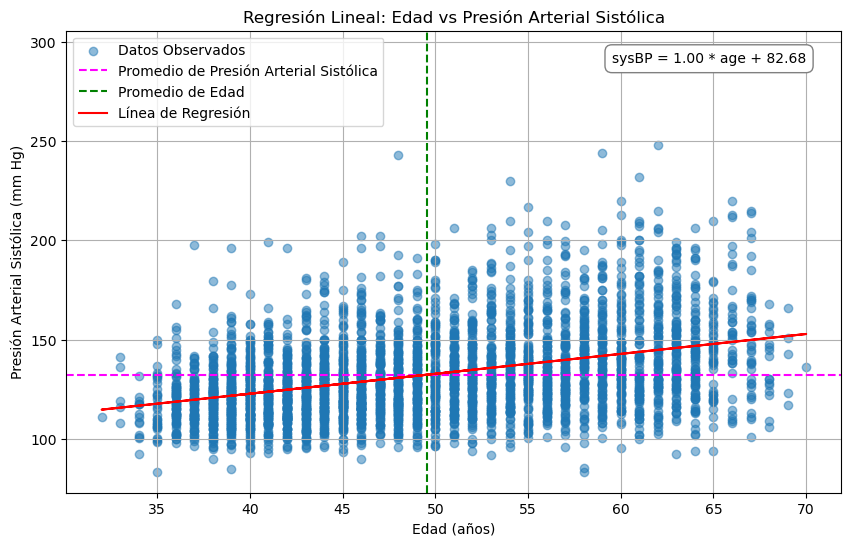

Edad: 30 años, Presión arterial sistólica: 112.76 mm Hg
Edad: 35 años, Presión arterial sistólica: 117.77 mm Hg
Edad: 40 años, Presión arterial sistólica: 122.79 mm Hg
Edad: 45 años, Presión arterial sistólica: 127.80 mm Hg
Edad: 50 años, Presión arterial sistólica: 132.81 mm Hg
Edad: 55 años, Presión arterial sistólica: 137.83 mm Hg
Edad: 60 años, Presión arterial sistólica: 142.84 mm Hg
Edad: 65 años, Presión arterial sistólica: 147.85 mm Hg
Edad: 70 años, Presión arterial sistólica: 152.87 mm Hg


In [17]:
import warnings

# Ignorar advertencias
warnings.filterwarnings("ignore")

# Seleccionar las columnas relevantes
X = df['age']  # Variable independiente
y = df['sysBP']  # Variable dependiente

# Agregar una constante a la variable independiente para el término de intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen de los resultados del modelo
print(model.summary())

# Extraer los parámetros estimados utilizando .iloc
intercept = model.params.iloc[0]  # α
slope = model.params.iloc[1]  # β

# Mostrar los parámetros estimados
print(f'Intercepto (α): {intercept:.2f}')
print(f'Pendiente (β): {slope:.2f}')

# Visualizar la relación con la línea de regresión
# Gráfico con línea de regresión, medias y etiquetas de la función
plt.figure(figsize=(10, 6))

# Gráfico de dispersión
plt.scatter(df['age'], df['sysBP'], alpha=0.5, label='Datos Observados')

# Título y ejes
plt.title('Regresión Lineal: Edad vs Presión Arterial Sistólica')
plt.xlabel('Edad (años)')
plt.ylabel('Presión Arterial Sistólica (mm Hg)')

# Líneas de promedio
plt.axhline(y=df['sysBP'].mean(), color='magenta', linestyle='--', label='Promedio de Presión Arterial Sistólica')
plt.axvline(x=df['age'].mean(), color='g', linestyle='--', label='Promedio de Edad')

# Línea de regresión
plt.plot(df['age'], intercept + slope * df['age'], color='red', label='Línea de Regresión')

# Mostrar la ecuación en la parte superior derecha del gráfico
equation_text = f'sysBP = {slope:.2f} * age + {intercept:.2f}'
plt.text(df['age'].max(), df['sysBP'].max(), equation_text, fontsize=10, color='black',
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Leyenda y cuadrícula
plt.legend(loc='upper left')

# Leyenda y cuadrícula
plt.legend()
plt.grid()

# Mostrar gráfico
plt.show()

# Definición de la función de regresión
def sysBP(age):
    return slope * age + intercept

# Ejemplo de uso de la función sysBP
# Calcular la presión arterial sistólica para diferentes edades
edades = []
for i in range(30, 71, 5):  # El 71 no se incluye
    edades.append(i)
presiones_sistolicas = [sysBP(age) for age in edades]

# Imprimir los resultados
for age, bp in zip(edades, presiones_sistolicas):
    print(f"Edad: {age} años, Presión arterial sistólica: {bp:.2f} mm Hg")

## ⭕️ **Analisis de Parametros:**

| Parámetro                | Valor               | Interpretación                                                                                  |
|--------------------------|---------------------|-------------------------------------------------------------------------------------------------|
| **Variable dependiente**  | `sysBP`             | La presión arterial sistólica (sysBP) es la variable objetivo en el modelo.                     |
| **R-cuadrado (R²)**       | 0.151               | Indica que el modelo explica el 15.1% de la variabilidad en `sysBP`. No es un ajuste muy alto.   |
| **R-cuadrado ajustado**   | 0.151               | Similar a R², confirma que el modelo tiene un ajuste débil.                                     |
| **Estadístico F**         | 649.7               | El modelo es estadísticamente significativo; hay una relación entre las variables.              |
| **Prob (F-statistic)**    | 4.69e-132           | La probabilidad asociada al estadístico F es extremadamente baja, lo que refuerza la relevancia del modelo. |
| **Intercepto (α)**        | 82.68               | Representa la presión arterial sistólica esperada cuando la edad es 0.                          |
| **Coeficiente (β)**       | 1.00                | Por cada año adicional de edad, la presión sistólica se incrementa en 1.00 mmHg.                |
| **Error estándar (β)**    | 0.039               | Mide la variabilidad del coeficiente de la edad; es bajo, lo que sugiere una estimación precisa. |
| **t-Valor (β)**           | 25.49               | Indica que la edad es un predictor muy significativo de la presión sistólica (valor p < 0.001).  |
| **P> /t/ (β)**             | 0.000               | La edad tiene un efecto significativo en la presión arterial sistólica.                         |
| **Intervalo de confianza (95%)** | [0.926, 1.080] | El coeficiente de edad está dentro de este rango con un 95% de confianza.                      |
| **Durbin-Watson**         | 1.993               | Cerca de 2, sugiere que no hay autocorrelación significativa en los residuos.                   |
| **Skew (Asimetría)**      | 0.962               | Muestra una ligera asimetría positiva en la distribución de los residuos.                       |
| **Kurtosis**              | 5.193               | La distribución de los residuos tiene colas más pesadas de lo normal (leptocúrtica).            |

### **Conclusiones**
- **Ajuste del modelo**: El modelo tiene un R² bajo (0.151), lo que sugiere que la edad explica solo una pequeña parte de la variabilidad en la presión arterial sistólica.
- **Significancia**: A pesar del bajo R², la variable `age` es un predictor significativo de la presión arterial sistólica, con un coeficiente de 1.00, lo que significa que la presión aumenta aproximadamente 1 mmHg por cada año de edad.
- **Precisión**: Los intervalos de confianza y el bajo error estándar sugieren que la estimación del efecto de la edad es precisa.


## **⚛️ 4.0 Correlación lineal múltiple - Relación entre variables**  
---

Para construir un modelo de regresión lineal múltiple, se consideran dos o más variables regresoras, estas pueden ser de tipo numérico o cualitativo. Para este caso,  considere todas las variables numéricas de la base principal y seleccione como variable respuesta la presión sistólica de los pacientes.

El primer paso para definir un modelo lineal múltiple consiste en estudiar la relación que existe entre las variables. Con esta información se puede identificar los mejores predictores para el modelo e identificar otras características que podrían afectar el desempeño del modelo.
- Construya una matriz que permita observar la correlación de todas las variables numéricas.
- Presente una gráfica adecuada que represente la correlación entre las variables.
- ¿Qué variables y en qué medida se relacionan mejor con la variable de interés?


## ⭕️ **Solución:**

In [18]:
import pandas as pd

# Supongamos que ya tienes cargado el DataFrame con los datos
# df es el DataFrame que contiene la base de datos

# Seleccionar solo las columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación para todas las variables numéricas
correlation_matrix = df[numerical_columns].corr()

# Filtrar la matriz de correlación para mostrar las correlaciones con 'sysBP'
correlation_with_sysBP = correlation_matrix[['sysBP']].sort_values(by='sysBP', ascending=False)

# Mostrar la matriz de correlación centrada en 'sysBP'
print(correlation_with_sysBP)


                    sysBP
sysBP            1.000000
diaBP            0.786727
prevalentHyp     0.697790
age              0.388551
BMI              0.331004
BPMeds           0.271291
TenYearCHD       0.222885
totChol          0.220130
heartRate        0.184901
glucose          0.134702
diabetes         0.102574
prevalentStroke  0.061080
male            -0.045484
cigsPerDay      -0.094764
education       -0.124511
currentSmoker   -0.134371


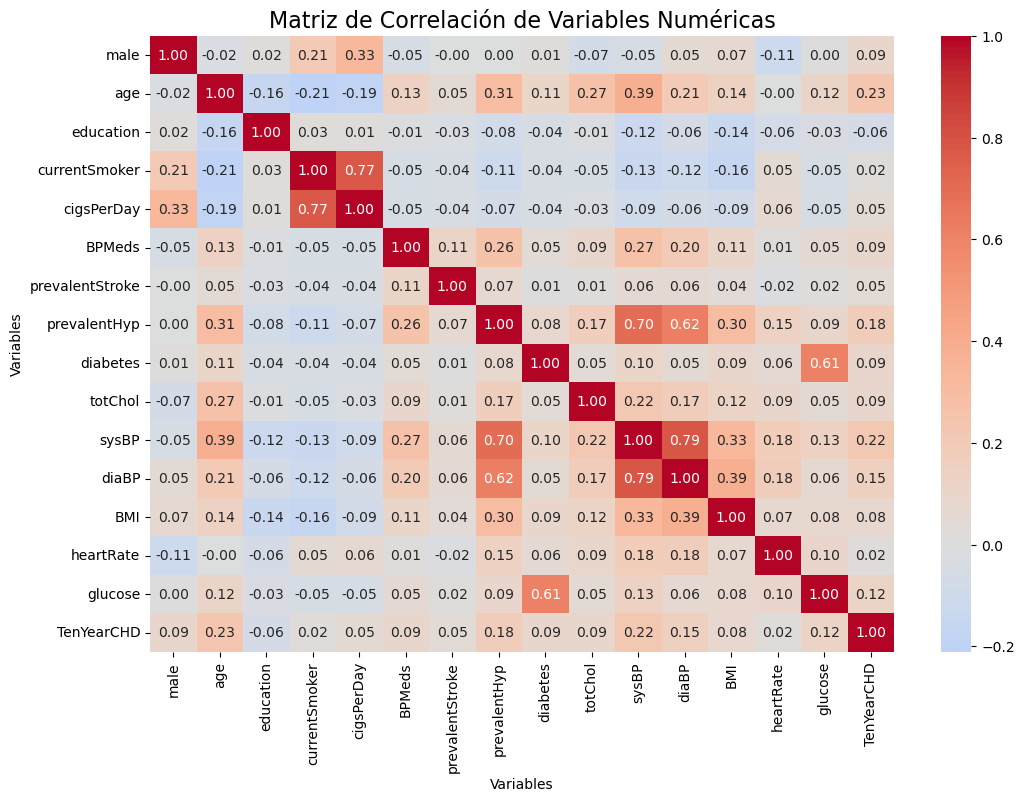

In [19]:
# Gráfica de correlaciones

# Seleccionar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Establecer la figura del heatmap
plt.figure(figsize=(12, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Títulos y etiquetas
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el heatmap
plt.show()


## ⭕️ **Conclusión sobre las Variables Relacionadas con SysBP**

En el análisis de correlación realizado, se observan las siguientes relaciones entre la presión arterial sistólica (sysBP) y otras variables:

* **Presión Arterial Diastólica (diaBP):** Con un coeficiente de correlación de 0.79, se establece una relación fuerte y positiva con sysBP. Esto sugiere que a medida que la presión diastólica aumenta, también tiende a aumentar la presión sistólica, lo cual es consistente con la fisiología cardiovascular, donde ambas medidas son interdependientes.

* **Hipertensión Prevalente (prevalentHyp):** La correlación de 0.70 indica una relación fuerte entre la presencia de hipertensión y la presión sistólica. Los pacientes diagnosticados como hipertensos tienden a tener una presión sistólica significativamente más alta, lo que resalta la importancia de controlar la hipertensión para el manejo de la salud cardiovascular.

* **Edad (age):** La correlación de 0.39 muestra una relación moderada entre la edad y sysBP. Esto implica que a medida que los pacientes envejecen, es probable que su presión arterial sistólica aumente, aunque no es la única variable determinante en este contexto.

* **Índice de Masa Corporal (BMI):** Con una correlación de 0.33, la relación entre BMI y sysBP es más débil, pero aún sugiere que un mayor índice de masa corporal puede estar asociado con un incremento en la presión arterial sistólica. Esto indica que el control del peso corporal puede ser relevante en el manejo de la hipertensión.

### **Resumen**

En conclusión, las variables que mejor se relacionan con la presión arterial sistólica son la presión arterial diastólica y la hipertensión prevalente, con correlaciones altas que sugieren una interdependencia significativa. La edad y el índice de masa corporal también están correlacionados con sysBP, pero en menor medida. Esto indica que, aunque el envejecimiento y el estado de peso son factores a considerar, las condiciones de presión arterial diastólica y hipertensión son determinantes más fuertes para la presión arterial sistólica. Para mejorar la salud cardiovascular, es crucial prestar atención a estas variables y su interacción.

## **⚛️ 5.0 Ajuste del modelo**  
---

- Ajustar un primer modelo utilizando todas las variables que se definieron como predictoras.
- Calcular y analizar el coeficiente de determinación del modelo
- ¿ El modelo es significativo?

### ⭕️ **Analisis y selección de variables predictoras**

Análisis de Correlaciones y Selección de Variables Predictoras para `sysBP`

| Variable         | Tipo de Dato | Correlación con `sysBP` | Interpretación                              | Selección como Predictora |
|------------------|--------------|-------------------------|---------------------------------------------|---------------------------|
| `diaBP`          | float64      | 0.786727                | Fuerte correlación positiva con `sysBP`. La presión arterial diastólica es un predictor clave. | Sí |
| `prevalentHyp`   | int64        | 0.697790                | Fuerte correlación positiva con `sysBP`. La hipertensión previa es un predictor importante. | Sí |
| `age`            | int64        | 0.388551                | Moderada correlación positiva con `sysBP`. La edad del paciente influye en la presión arterial sistólica. | Sí |
| `BMI`            | float64      | 0.331004                | Moderada correlación positiva con `sysBP`. El índice de masa corporal tiene impacto en la presión arterial. | Sí |
| `BPMeds`         | float64      | 0.271291                | Moderada correlación positiva con `sysBP`. El uso de medicamentos para la presión arterial afecta `sysBP`. | Sí |
| `TenYearCHD`     | int64        | 0.222885                | Baja correlación positiva con `sysBP`. El riesgo de enfermedad coronaria tiene una relación débil. | Opcional |
| `totChol`        | float64      | 0.220130                | Baja correlación positiva con `sysBP`. El colesterol total muestra una relación débil con la presión arterial. | Opcional |
| `heartRate`      | float64      | 0.184901                | Baja correlación positiva con `sysBP`. El ritmo cardíaco tiene una relación débil con `sysBP`. | Opcional |
| `glucose`        | float64      | 0.134702                | Baja correlación positiva con `sysBP`. El nivel de glucosa en sangre muestra una relación débil. | Opcional |
| `diabetes`       | int64        | 0.102574                | Baja correlación positiva con `sysBP`. La diabetes tiene una relación débil con la presión arterial sistólica. | Opcional |
| `prevalentStroke`| int64        | 0.061080                | Muy baja correlación positiva con `sysBP`. La apoplejía previa tiene poca relación con la presión sistólica. | No |
| `male`           | int64        | -0.045484               | Correlación negativa muy débil con `sysBP`. El sexo masculino muestra muy poca relación con la presión arterial. | No |
| `cigsPerDay`     | float64      | -0.094764               | Correlación negativa débil con `sysBP`. Fumar cigarrillos muestra una relación inversa leve con la presión sistólica. | No |
| `education`      | float64      | -0.124511               | Correlación negativa baja con `sysBP`. El nivel educativo tiene poca influencia sobre la presión sistólica. | No |
| `currentSmoker`  | int64        | -0.134371               | Correlación negativa baja con `sysBP`. Ser fumador actual tiene una relación inversa débil con la presión arterial. | No |

In [20]:
#Inicialización de variables predictoras: Marcadas con Sí y Opcional
predictors = ['diaBP', 'prevalentHyp', 'age', 'BMI', 'BPMeds',
              'TenYearCHD', 'totChol', 'heartRate', 'glucose', 'diabetes']

### ⭕️ **Modelo con todas las variables predictoras**

In [21]:
# Ajuste del primer modelo utilizando todas las variables que se definieron como predictoras.
# Seleccionar las variables numéricas (asegúrate de que no hay valores nulos)
X = df[predictors] # Variable independientes
y = df['sysBP']  # Variable dependiente

# Agregar una constante para el término de intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Resumen de los resultados del modelo
print(model.summary())

# Calcular el coeficiente de determinación (R²)
r_squared = model.rsquared
print(f'Coeficiente de determinación (R²): {r_squared:.4f}')

                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     987.3
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:20:56   Log-Likelihood:                -14107.
No. Observations:                3656   AIC:                         2.824e+04
Df Residuals:                    3645   BIC:                         2.830e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3738      2.504      4.542   

### ⭕️ **Analisis del coeficiente de determinación del modelo**
El coeficiente de determinación (R²) de 0.7363 sugiere que aproximadamente el 73.63% de la variabilidad en la presión arterial sistólica (sysBP) puede explicarse por las variables predictoras incluidas en el modelo. Este valor indica una relación sólida entre las variables, lo que respalda la efectividad del modelo en la predicción de la presión arterial. Además, el ajuste del modelo se considera bueno, aunque existe un 26.37% de variabilidad que permanece sin explicar, lo que podría implicar que hay otros factores no considerados que también afectan la presión arterial.

In [22]:
# Determinación si el modelo es significativo
# Definir las variables dependiente e independiente
X = df[predictors] # Variable independientes
y = df['sysBP']  # Variable dependiente

# Agregar una constante a las variables independientes para el término de intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener el F-statistic y el p-value
f_statistic = model.fvalue
p_value = model.f_pvalue

# Mostrar los resultados
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')


F-statistic: 987.3375
p-value: 0.0000


## ⭕️ **¿ El modelo es significativo?**


* **estadístico F:** Este valor es alto, lo que sugiere que al menos una de las variables independientes en el modelo tiene un efecto significativo en la variable dependiente (sysBP).

* **p-value:** El p-value asociado al estadístico F es 0.00, que es mucho menor que el nivel de significancia comúnmente utilizado (α = 0.05). Esto indica que podemos rechazar la hipótesis nula de que todos los coeficientes son iguales a cero (es decir, que ninguna de las variables independientes tiene un efecto significativo en sysBP).

**Conclusión:**
Sí, el modelo es significativo, ya que el estadístico F es alto y el p-value es muy bajo, lo que indica que las variables independientes en el modelo explican de manera significativa la variabilidad de la presión arterial sistólica.



##**⚛️ 6.0 Modelos adicionales**  
---

- Proponer dos modelos adicionales haciendo selección de variabes pregresoras.
- Calcular y analizar el coeficiente de determinación para cada modelo
- ¿ El modelo es significativo?

## ⭕️ **Modelo 2: Selección hacia atrás**



In [23]:
# Modelo 2: Selección hacia atrás
# Incluir todas las variables
X1 = df[predictors] # Variable independientes
y = df['sysBP']

# Ajustar el modelo de regresión lineal
model1 = sm.OLS(y, sm.add_constant(X1)).fit()
print("Modelo 3: Selección hacia atrás")
print(model1.summary())
print(f'R²: {model1.rsquared:.4f}\n')

Modelo 3: Selección hacia atrás
                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     987.3
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:20:59   Log-Likelihood:                -14107.
No. Observations:                3656   AIC:                         2.824e+04
Df Residuals:                    3645   BIC:                         2.830e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           

In [24]:
# Modelo 3: Selección hacia adelante
# Seleccionar un subconjunto de variables
X2 = df[['diaBP', 'prevalentHyp', 'age', 'BMI', 'BPMeds']] #Solo las variables marcadas con sí
model2 = sm.OLS(y, sm.add_constant(X2)).fit()
print("Modelo 3: Selección hacia adelante")
print(model2.summary())
print(f'R²: {model2.rsquared:.4f}\n')

Modelo 3: Selección hacia adelante
                            OLS Regression Results                            
Dep. Variable:                  sysBP   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1920.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:20:59   Log-Likelihood:                -14147.
No. Observations:                3656   AIC:                         2.831e+04
Df Residuals:                    3650   BIC:                         2.834e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        

In [25]:
# Obtener el valor p del F-statistic para el modelo de selección hacia atrás
f_p_value_model1 = model1.f_pvalue
print(f"Valor p del modelo de selección hacia atrás: {f_p_value_model1:.4f}")

# Obtener el valor p del F-statistic para el modelo de selección hacia adelante
f_p_value_model2 = model2.f_pvalue
print(f"Valor p del modelo de selección hacia adelante: {f_p_value_model2:.4f}")

# Evaluar la significancia
significant_model1 = f_p_value_model1 < 0.05
significant_model2 = f_p_value_model2 < 0.05

print(f"¿El modelo de selección hacia atrás es significativo? {'Sí' if significant_model1 else 'No'}")
print(f"¿El modelo de selección hacia adelante es significativo? {'Sí' if significant_model2 else 'No'}")


Valor p del modelo de selección hacia atrás: 0.0000
Valor p del modelo de selección hacia adelante: 0.0000
¿El modelo de selección hacia atrás es significativo? Sí
¿El modelo de selección hacia adelante es significativo? Sí


## ⭕️ **¿ El modelo es significativo?**

Si ambos modelos tienen un valor p significativo para el F-statistic (p < 0.05), se puede concluir que ambos modelos son significativos y que al menos una de las variables predictoras tiene una relación significativa con la presión sistólica.

Sin embargo, el modelo de selección hacia atrás tiene un mejor ajuste en términos de 𝑅2, lo que indica que explica mejor la variabilidad de la presión sistólica en comparación con el modelo de selección hacia adelante.

## **⚛️ 7.0 Selección del mejor modelo**  
---

- Seleccionar el mejor modelo teniendo en cuenta el coeficiente de determinación u otro método de selección.
- Realizar un diagnóstico gráfico a los residuos del modelo seleccionado

R² del modelo de selección hacia atrás: 0.7304
R² del modelo de selección hacia adelante: 0.7245
El mejor modelo es: Modelo de Selección Hacia Atrás


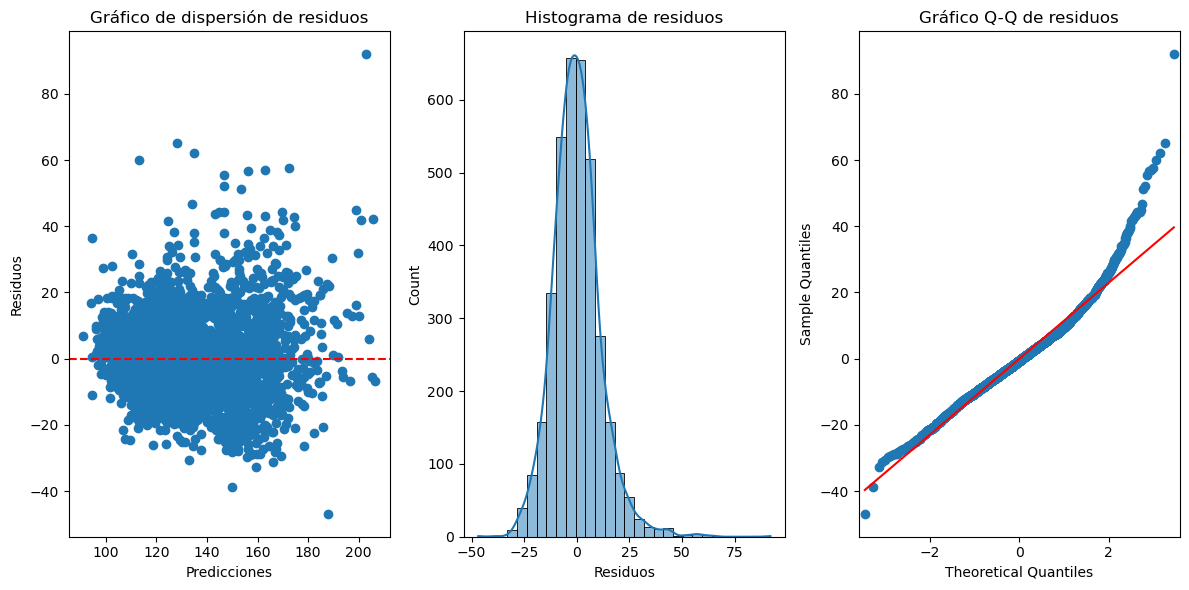

In [26]:
# Grafica de residuales

# Supongamos que ya tienes tus modelos ajustados: model1 y model2
# Coeficientes de determinación
r_squared_model1 = model1.rsquared
r_squared_model2 = model2.rsquared

print(f"R² del modelo de selección hacia atrás: {r_squared_model1:.4f}")
print(f"R² del modelo de selección hacia adelante: {r_squared_model2:.4f}")

# Seleccionar el mejor modelo
best_model = model1 if r_squared_model1 > r_squared_model2 else model2
print(f"El mejor modelo es: {'Modelo de Selección Hacia Atrás' if best_model == model1 else 'Modelo de Selección Hacia Adelante'}")

# Obtener los residuos y las predicciones
residuals = best_model.resid
predictions = best_model.fittedvalues

# Gráfico de dispersión de residuos: Para verificar la homocedasticidad.
# Histograma de residuos: Para evaluar la normalidad de los residuos.
# Gráfico Q-Q: Para verificar la normalidad de los residuos.

# Gráfico de dispersión de residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de dispersión de residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')

# Histograma de residuos
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histograma de residuos')
plt.xlabel('Residuos')

# Gráfico Q-Q
plt.subplot(1, 3, 3)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Gráfico Q-Q de residuos')

plt.tight_layout()
plt.show()



### ⭕️ **Diagnóstico gráfico a los residuos del modelo seleccionado**

* **Gráfico de dispersión de residuos:** Idealmente, los residuos estan distribuidos aleatoriamente alrededor de cero con algunos comportamientos atipicos, lo que indica que son nulos o hay pocos patrones en los errores.

* **Histograma de residuos:** Tiene una forma similar a la campana, lo que indica que los residuos se distribuyen normalmente.

* **Gráfico Q-Q:** Los puntos siguen la línea recta en su mayoria, lo que indica que los residuos siguen una distribución normal.

### ⭕️ **Conclusión**

En resumen, el modelo de selección hacia atrás no solo ofrece un buen ajuste a los datos, como lo indica su coeficiente de determinación, sino que también cumple con las suposiciones necesarias para ser considerado significativo. Esto permite concluir que el modelo es robusto y puede ser utilizado de manera efectiva para realizar predicciones sobre la presión arterial sistólica en la población analizada.

## **⚛️ 8.0 Verificación de supuestos**  
---

- Realizar un test que permita probar la hipótesis nula de que los residuales siguen una distribución normal.

### ⭕️ **Metodología del test para probar Hipotesis Nula**

1.   Calcular los residuos del modelo.
2.   Aplicar el test de Shapiro-Wilk.
3.   Interpretar los resultados.

### ⭕️ **Conclusión**

Dado que el valor 𝑝 es mucho menor que cualquier umbral común de significanci ( 𝛼 = 0.05 ), podemos concluir que hay suficiente evidencia para rechazar la hipótesis nula.

Estadístico de Shapiro-Wilk: 0.9645240464893213
Valor p: 4.3719045790499935e-29
Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.


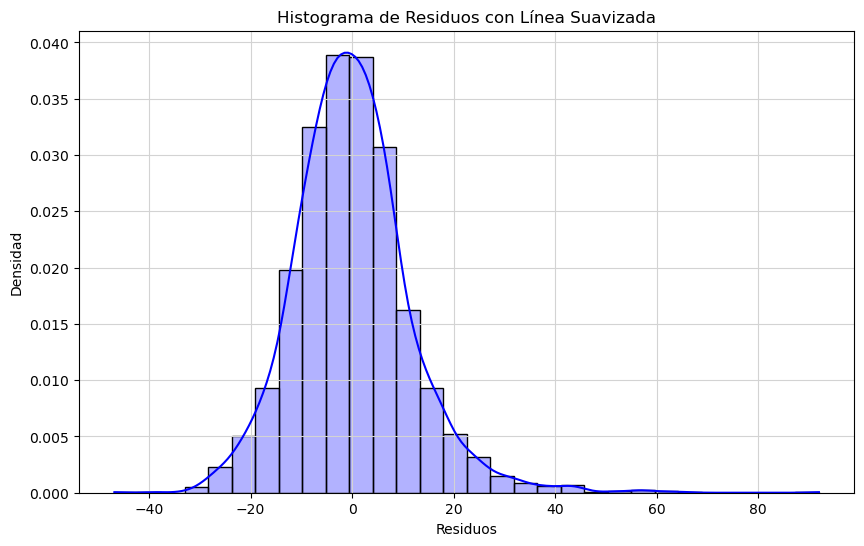

In [27]:
# Test de normaliad usando todas las variables predictoras.
X = df[predictors]  # variables predictoras
X = sm.add_constant(X)  # Añadir constante para el intercepto
y = df['sysBP']  # Variable dependiente
model = sm.OLS(y, X).fit()

# Obtener los residuos
residuals = model.resid

# Realizar el test de Shapiro-Wilk
shapiro_stat, p_value = stats.shapiro(residuals)

# Mostrar los resultados
print('Estadístico de Shapiro-Wilk:', shapiro_stat)
print('Valor p:', p_value)

# Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print('No se rechaza la hipótesis nula: los residuos siguen una distribución normal.')
else:
    print('Se rechaza la hipótesis nula: los residuos no siguen una distribución normal.')

# Visualizar los residuos con histograma y línea suavizada
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue', edgecolor='black', stat='density', alpha=0.3)
plt.title('Histograma de Residuos con Línea Suavizada')
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.grid(color='lightgray')  # Cuadrículas en gris claro
plt.show()

Se llevó a cabo el test de Shapiro-Wilk para evaluar la hipótesis nula de que los residuos del modelo siguen una distribución normal. Los resultados fueron los siguientes:

* **Estadístico de Shapiro-Wilk:** 0.9645240464893217
* **Valor p:** 4.371904579051402e-29

Dado que el valor p es significativamente menor que el nivel de significancia común (0.05), se rechaza la hipótesis nula (H₀) de que los residuos siguen una distribución normal. Esto sugiere que los residuos presentan una distribución no normal, lo cual es un indicativo de que el modelo podría no estar ajustándose adecuadamente a los datos o que podrían existir patrones no capturados en los residuos.

El estadístico de Shapiro-Wilk también proporciona una medida de la normalidad, donde un valor más cercano a 1 indica normalidad. En este caso, el valor de 0.9629 sugiere cierta desviación de la normalidad.

Concluir sobre la verificación del supuesto de normalidad en los residuales.


**¡Felicitaciones! ¡Muy buen trabajo!**

Entrega
Para entregar el notebook por favor haga lo siguiente:

1. Descargue el notebook (Archivo -> Descargar .ipynb).
2. Importelo como archivo HTML.
3. Realice el envío del archivo en la tarea dispuesta en el aula virtual.
4. No olvide escribir los nombres de los integrantes del grupo en el momento de hacer la entrega.